# Time Series Data Analysis with Pandas



https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../../CODE-APRIL/Data/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


## 2. Convert Index to Datetime:


In [4]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [5]:
df['date'].max()

Timestamp('2017-01-01 00:00:00')

In [6]:
df['date'].min()

Timestamp('2013-01-01 00:00:00')

In [7]:
df.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.348103,16.769652,4.561602,180.231668


In [8]:
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df["month"] = df["date"].dt.month
df['month_name']=df['month'].replace({1:'Jan', 
                                     2:'Feb', 
                                     3:'Mar', 4:'Apr', 
                                     5:'May', 
                                     6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [9]:
df.set_index('date', inplace=True)
df

,meantemp,humidity,wind_speed,meanpressure,day,year,month,month_name
date,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013,1,Jan
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2,2013,1,Jan
2013-01-03,7.166667,87.000000,4.633333,1018.666667,3,2013,1,Jan
2013-01-04,8.666667,71.333333,1.233333,1017.166667,4,2013,1,Jan
2013-01-05,6.000000,86.833333,3.700000,1016.500000,5,2013,1,Jan
...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,28,2016,12,Dec
2016-12-29,15.238095,87.857143,6.000000,1016.904762,29,2016,12,Dec
2016-12-30,14.095238,89.666667,6.266667,1017.904762,30,2016,12,Dec


## Distribution

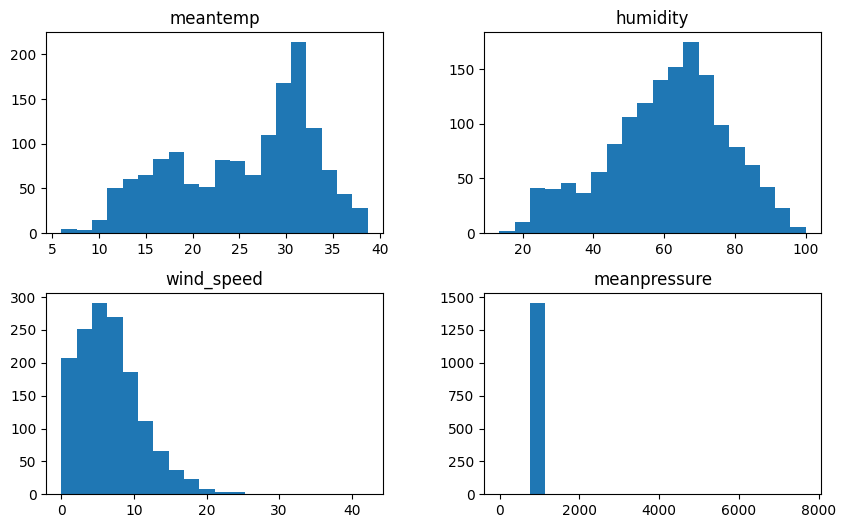

In [10]:
df.drop(['day', 'month', 'year'], axis=1).hist(bins=20, grid=False, figsize=(10, 6));

# Trends Over Time

## Yearly Average Temperatures

In [11]:
column_map = {
    'meantemp': 'Mean Temperature (°C)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (km/h)',
    'meanpressure': 'Mean Pressure (hPa)'
}

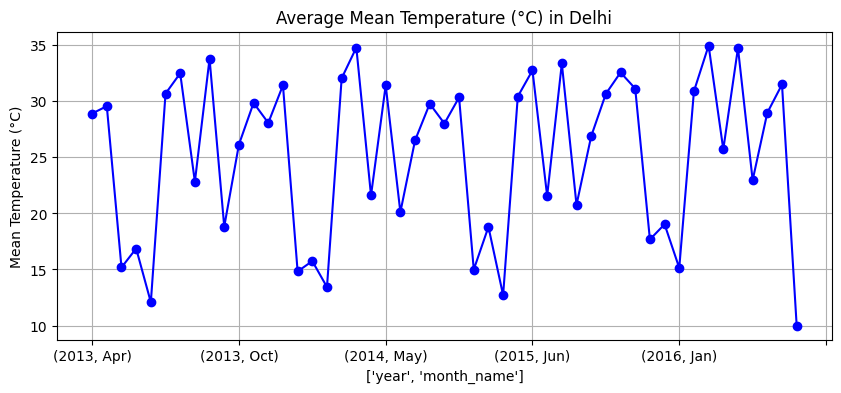

In [12]:
def plot_averages (df, groupby, col):
    avg = df.groupby(groupby)[col].mean()
    plt.figure(figsize=(10, 4))
    avg.plot(marker='o', linestyle='-', color='blue')
    if isinstance (groupby, str):
        plt.title(f"Average {groupby.title()} {column_map.get(col, col)} in Delhi")
        plt.xticks(avg.index)  # Show each year on the x-axis

    else: 
        plt.title(f"Average {column_map.get(col, col)} in Delhi")
        # plt.xticks(range(len(avg.index)), avg.index.map(lambda x: ' '.join(str(i) for i in x)), rotation=45)
    plt.xlabel(groupby)
    plt.ylabel(column_map.get(col, col))
    plt.grid()
    plt.show()
plot_averages(df, ['year', 'month_name'], 'meantemp')

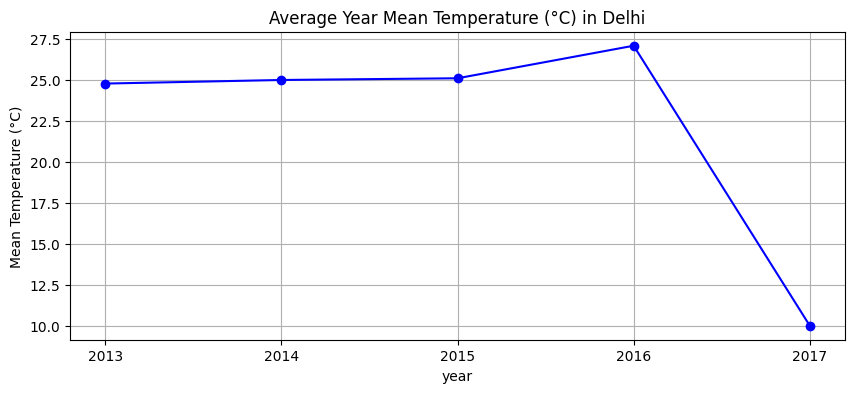

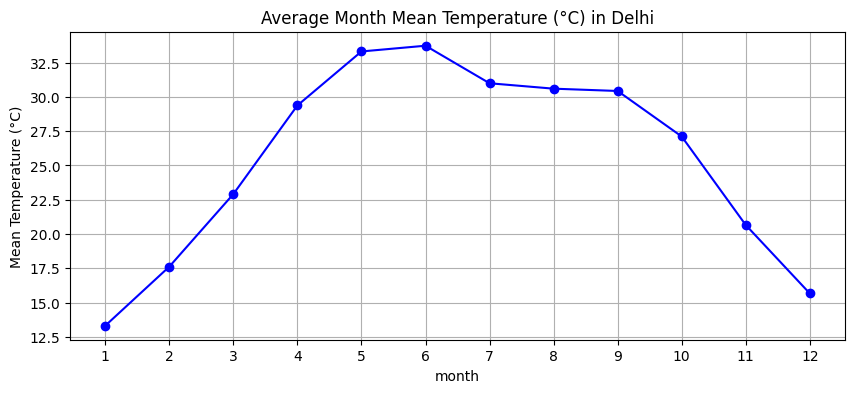

In [13]:
plot_averages (df, 'year', 'meantemp')
plot_averages (df, 'month', 'meantemp')

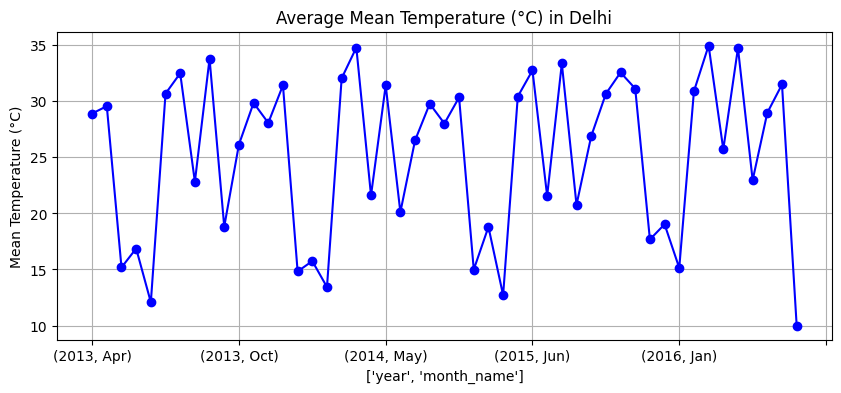

In [14]:
plot_averages (df, ['year', 'month_name'], 'meantemp')

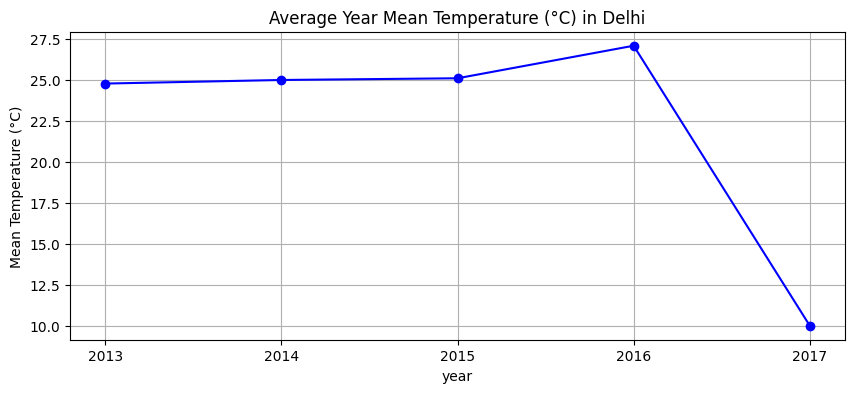

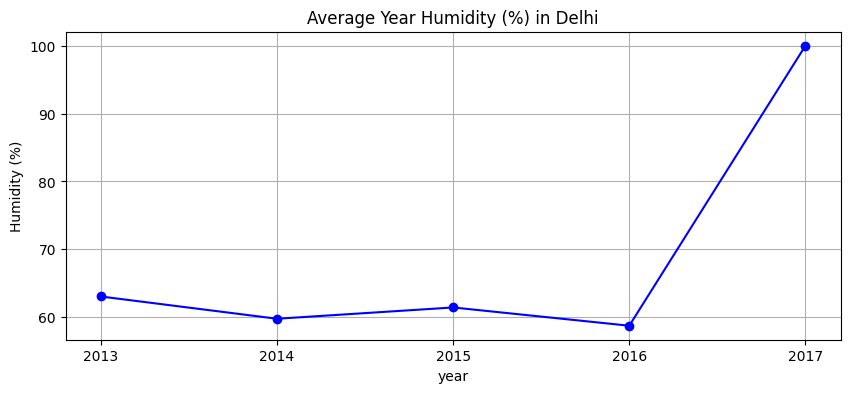

In [15]:
plot_averages (df, 'year', 'meantemp')
plot_averages (df, 'year', 'humidity')

## Moving Averages

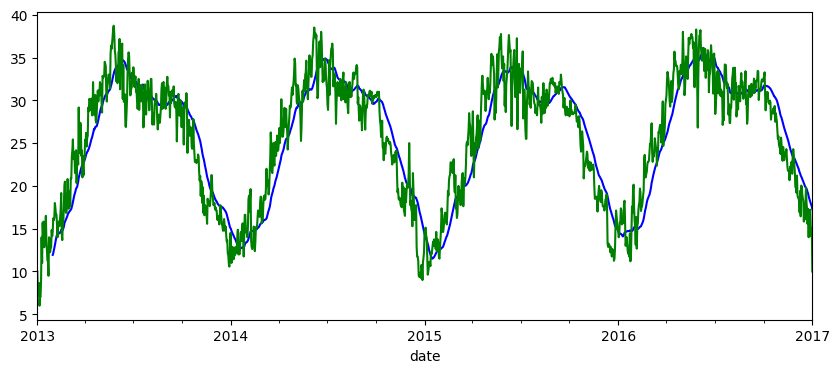

In [16]:
moving_avg = df['meantemp'].rolling(window=30).mean()
moving_avg.plot(figsize=(10, 4), linestyle='-', color='blue');
df['meantemp'].plot(figsize=(10, 4), linestyle='-', color='green');

In [17]:
def plot_moving_avg (df, col, groupby ='year', window=3):
    avg = df.groupby(groupby)[col].mean()
    plt.figure(figsize=(10, 4))
    moving_avg = avg.rolling(window=window).mean()

    avg.plot(marker='o', linestyle='-', color='blue', label=f'{groupby.title()}ly  Average')
    moving_avg.plot(marker='x', linestyle='-', color='orange', label=f'{window}-{groupby.title()} Moving Average')

    plt.title(f"{groupby.title()}ly {column_map.get(col, col)}with Moving Average  in Delhi")
    # plt.xticks(avg.index)  # Show each year on the x-axis

    plt.xlabel(groupby)
    plt.ylabel(column_map.get(col, col))
    plt.grid()
    plt.legend()
    plt.show()

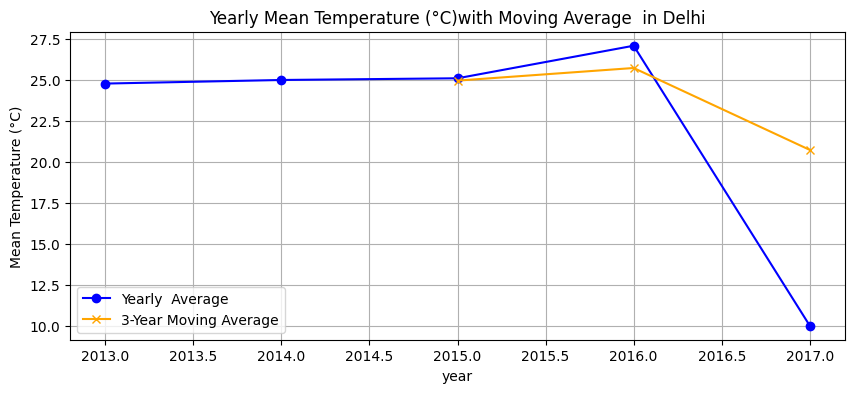

In [18]:
plot_moving_avg (df, 'meantemp', groupby ='year', window=3)

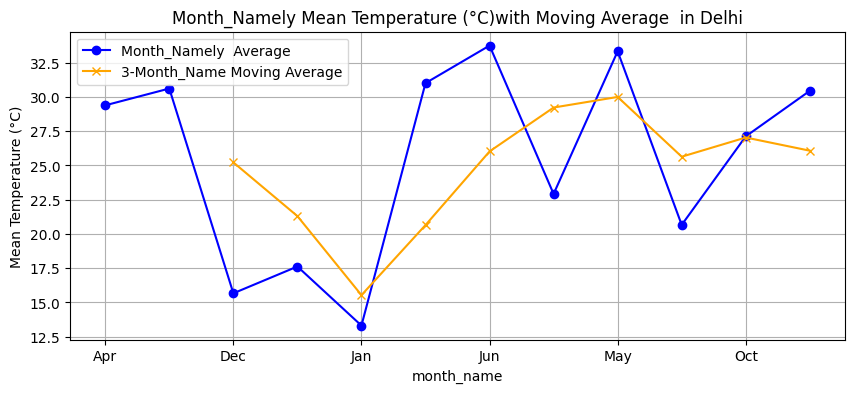

In [19]:
plot_moving_avg (df, 'meantemp', groupby ='month_name', window=3)


## Time Series Analysis

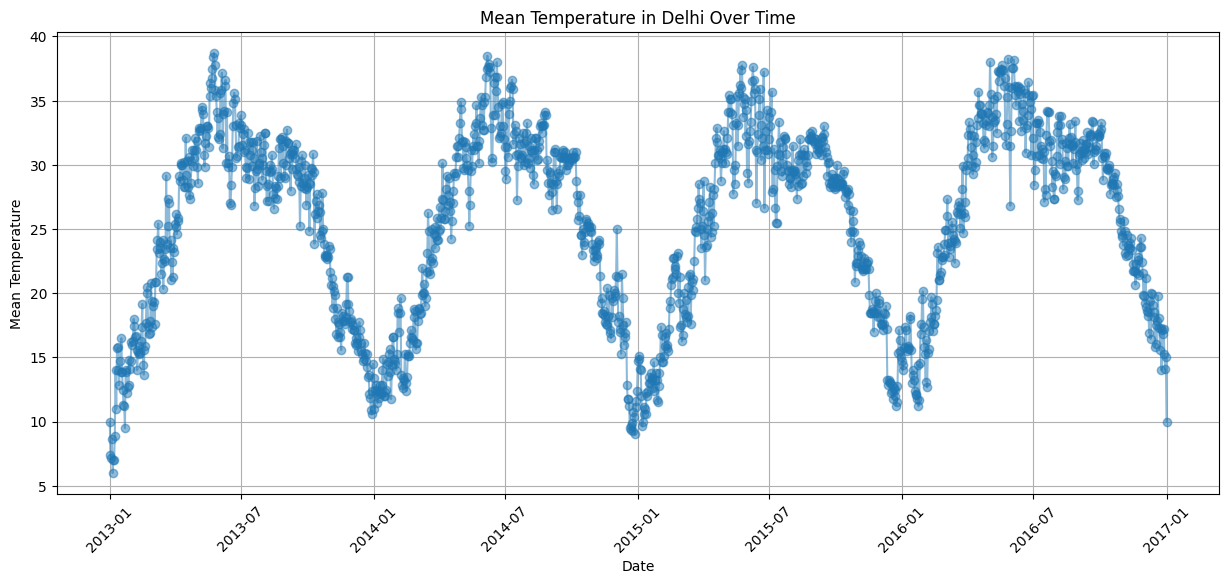

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(df['meantemp'], marker='o', linestyle='-', alpha=0.5)
plt.title("Mean Temperature in Delhi Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.grid()
plt.xticks(rotation=45)
plt.show()

## Temperature Change

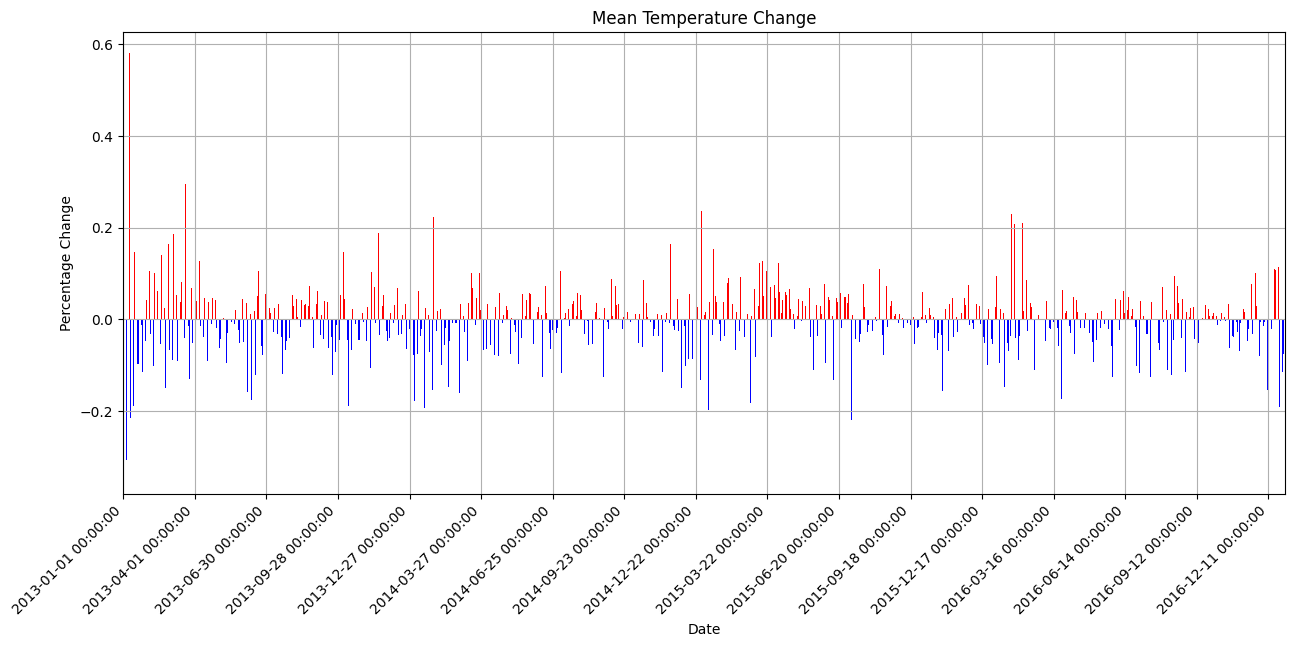

In [21]:
df['meantemp_change'] = df['meantemp'].pct_change()
colors = df['meantemp_change'].apply(lambda x: 'red' if x > 0 else 'blue')
ax = df['meantemp_change'].plot(kind='bar', figsize=(15, 6), color=colors, title='Mean Temperature Change')

n = 90
plt.xticks(range(0, len(df), n), df.index[::n], rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid()
plt.show()
# df['meantemp_change'].plot(figsize=(10, 6), title='Mean Temperature Change');

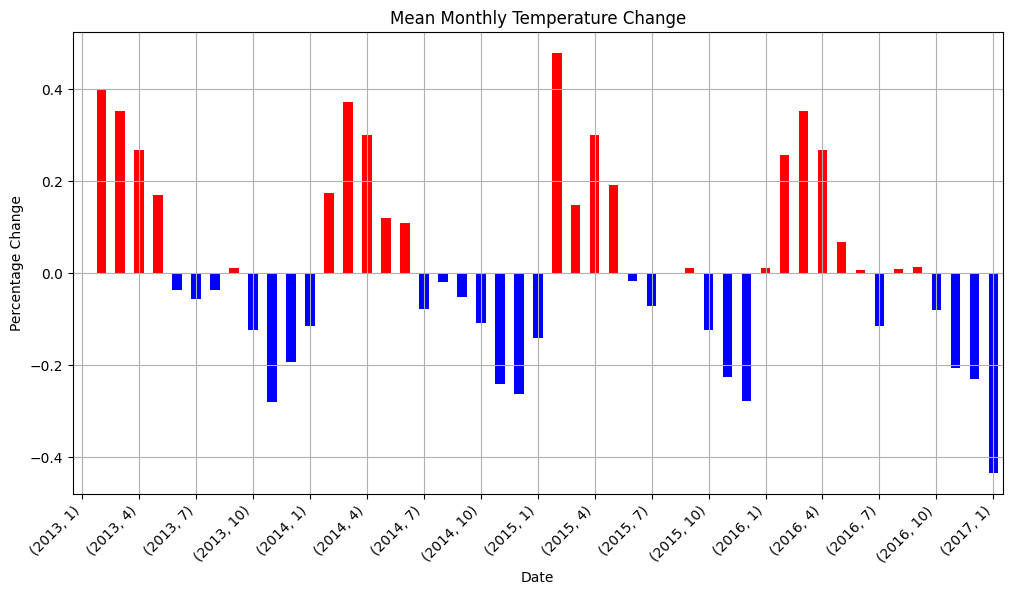

In [22]:

monthly_mean = df.groupby(['year', 'month'])['meantemp'].mean()
monthly_mean_change = monthly_mean.pct_change()

colors = monthly_mean_change.apply(lambda x: 'red' if x > 0 else 'blue')

# Plot the percentage change with colors
ax = monthly_mean_change.plot(kind='bar', figsize=(12, 6), color=colors, title='Mean Monthly Temperature Change')

# Set x-axis labels to show every nth label
n = 3  # Adjust this to show fewer or more labels
plt.xticks(range(0, len(monthly_mean), n), monthly_mean.index[::n], rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid()
plt.show()

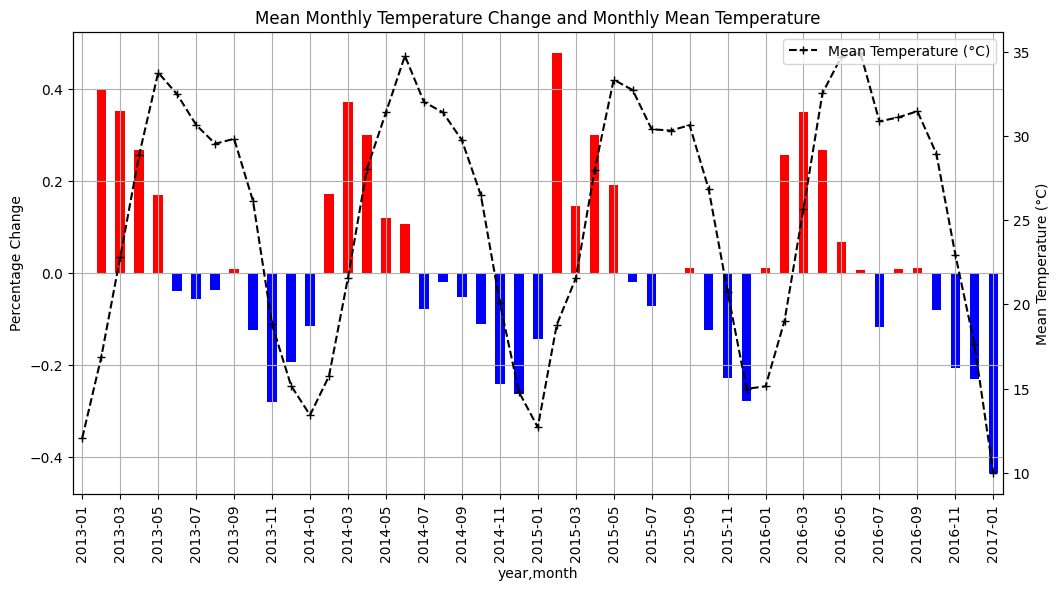

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
monthly_mean_change.plot(kind='bar', ax=ax, color=colors)

# Create a secondary y-axis for mean temperature
ax2 = ax.twinx()

# Flatten the index for the x-axis labels
x_labels = [f"{int(year)}-{int(month):02d}" for year, month in monthly_mean.index]

# Plot the mean temperature on the secondary axis
ax2.plot(x_labels, monthly_mean, color='black', label='Mean Temperature (°C)', linestyle='--', marker='+')

# Set the y-axis labels
ax.set_ylabel('Percentage Change')
ax2.set_ylabel('Mean Temperature (°C)')

n = 2  # Adjust this to show fewer or more labels
plt.xticks(range(0, len(monthly_mean), n), x_labels[::n], rotation=45, ha='right')

ax.grid()
ax2.legend(loc='upper right')

plt.xlabel('Date')
plt.title('Mean Monthly Temperature Change and Monthly Mean Temperature')
plt.show()


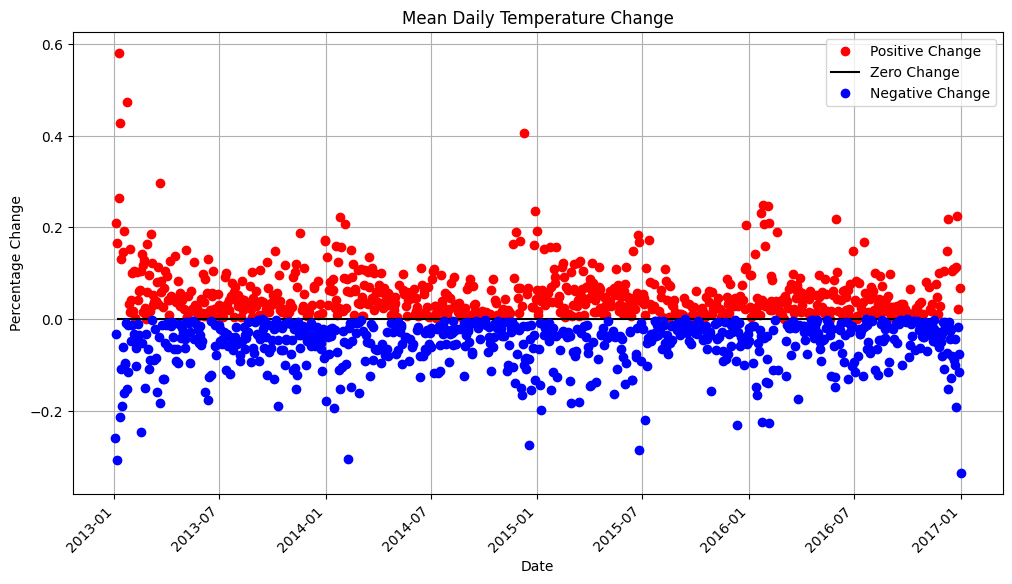

In [24]:
df['meantemp_change'] = df['meantemp'].pct_change()

plt.figure(figsize=(12, 6))

# Plot positive changes in red and negative changes in blue
plt.plot(df.index[df['meantemp_change'] > 0], df['meantemp_change'][df['meantemp_change'] > 0], 'ro', label='Positive Change')
plt.plot(df.index[df['meantemp_change'] == 0], df['meantemp_change'][df['meantemp_change'] == 0], 'black', label='Zero Change')
plt.plot(df.index[df['meantemp_change'] < 0], df['meantemp_change'][df['meantemp_change'] < 0], 'bo', label='Negative Change')
plt.xticks(rotation=45, ha='right')

plt.title('Mean Daily Temperature Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change')

plt.grid(True)
plt.legend()
plt.show()


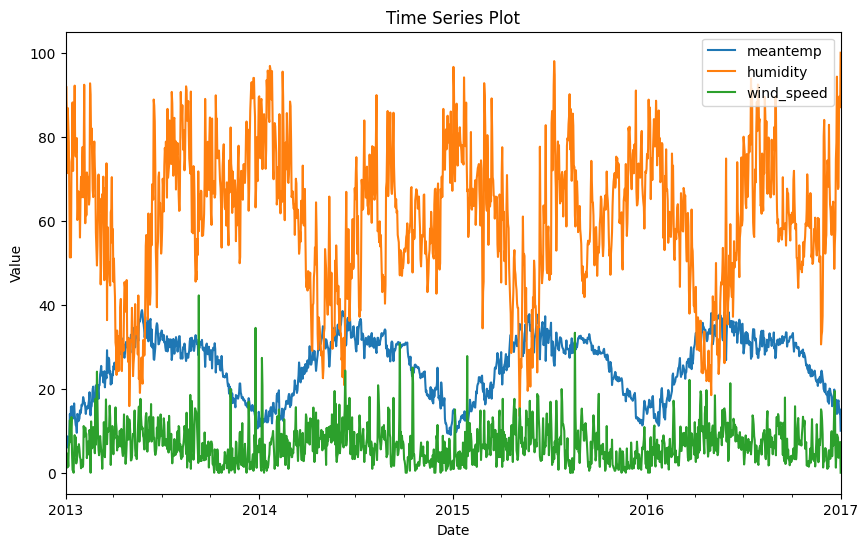

In [25]:
df['meantemp'].plot(figsize=(10, 6), title='Time Series Plot')
df['humidity'].plot(figsize=(10, 6), title='Time Series Plot')
df['wind_speed'].plot(figsize=(10, 6), title='Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

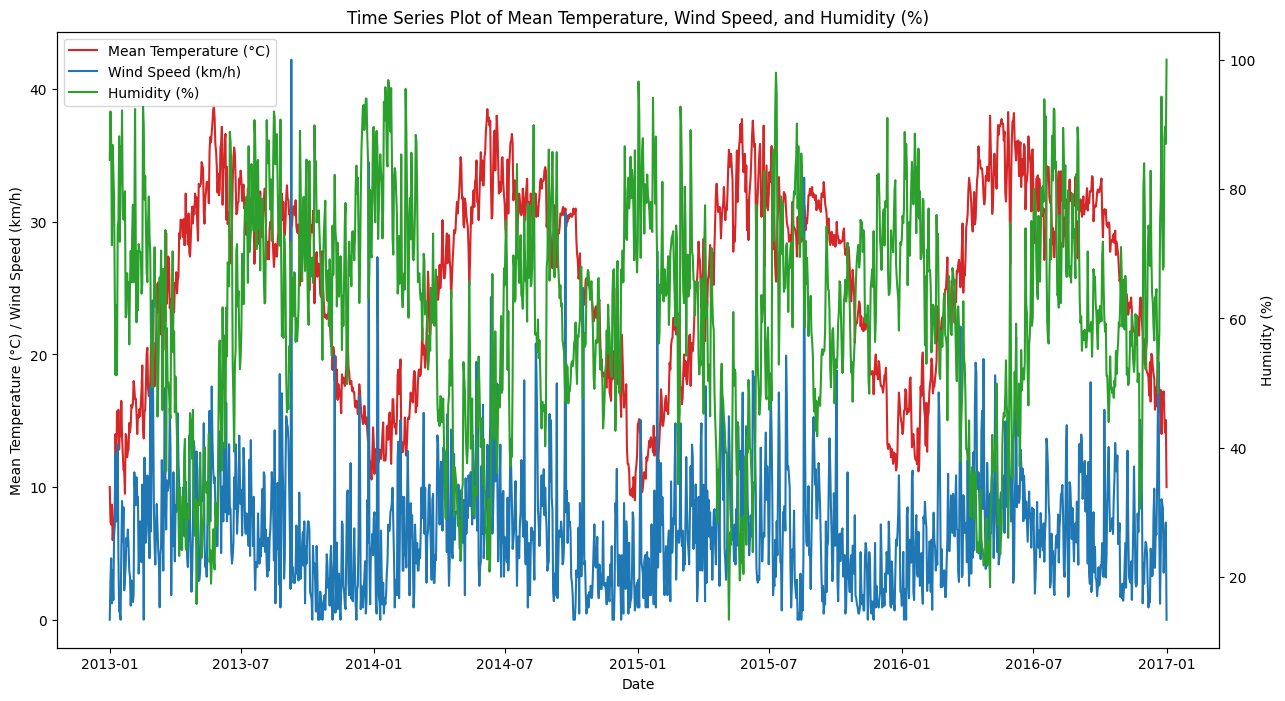

In [26]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot mean temperature and wind speed on the primary y-axis
ax1.plot(df.index, df['meantemp'], color='tab:red', label='Mean Temperature (°C)')
ax1.plot(df.index, df['wind_speed'], color='tab:blue', label='Wind Speed (km/h)')
# ax1.plot(df.index, df['humidity'], linestyle='-', color='black', label='Humidity (%)')

ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Temperature (°C) / Wind Speed (km/h)')
ax1.tick_params(axis='y')

# Create a secondary y-axis for mean pressure
ax2 = ax1.twinx()
ax2.plot(df.index, df['humidity'], color='tab:green', label='Humidity (%)')


ax2.set_ylabel('Humidity (%)')
ax2.tick_params(axis='y')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
plt.title('Time Series Plot of Mean Temperature, Wind Speed, and Humidity (%)')
plt.show()


In [27]:
def plot_time_series (df, column):
    df[column].plot(figsize=(10, 6), title=f'{column.upper()} Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid()
    plt.show()

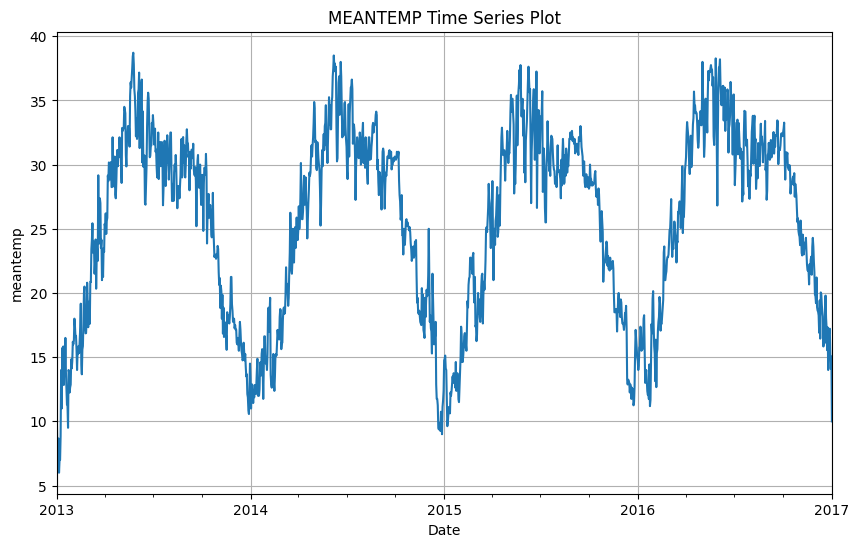

In [28]:
plot_time_series(df, 'meantemp')

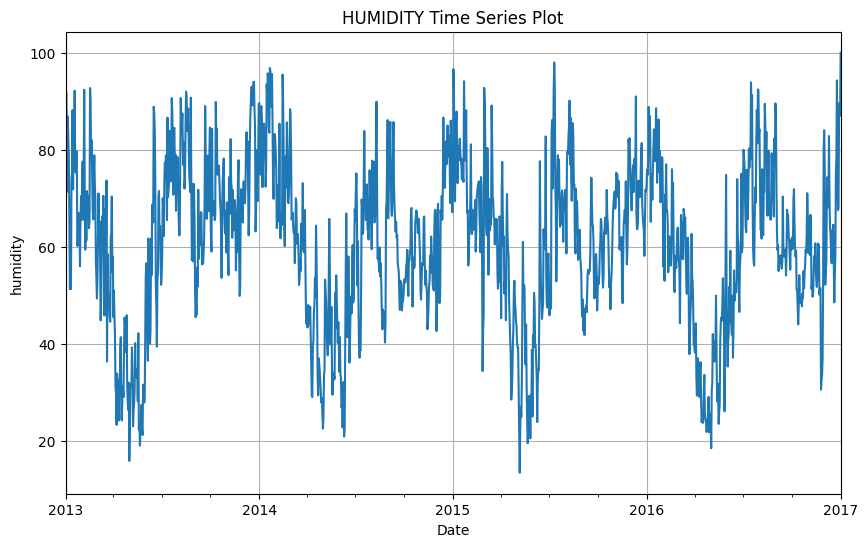

In [29]:
plot_time_series(df, 'humidity')


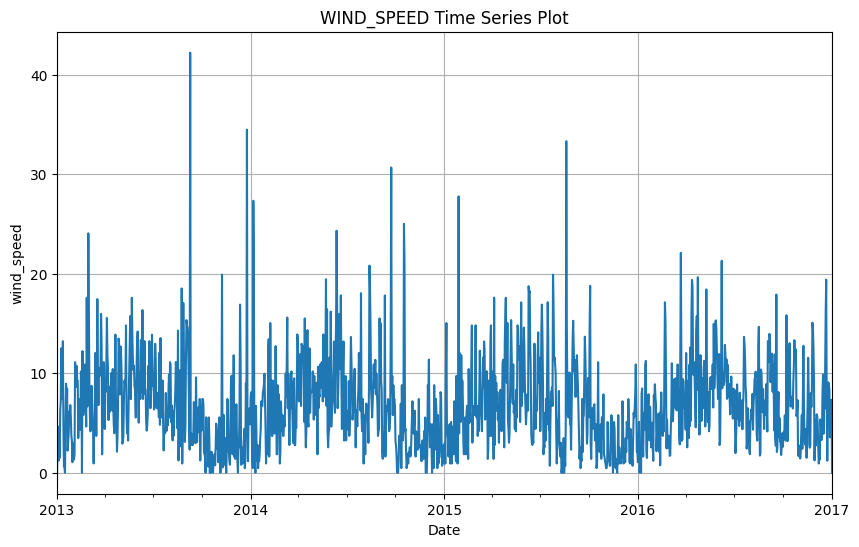

In [30]:
plot_time_series(df, 'wind_speed')


In [31]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'day', 'year',
       'month', 'month_name', 'meantemp_change'],
      dtype='object')

# Seasonal Analysis

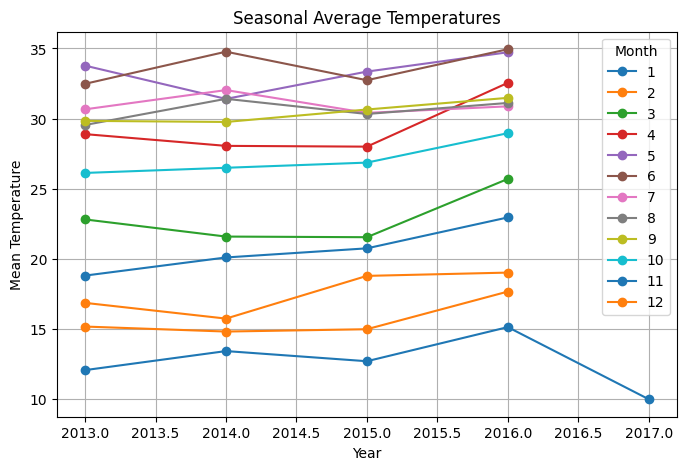

In [32]:
seasonal_avg = df.groupby(['year', 'month'])['meantemp'].mean().unstack()
seasonal_avg.plot(figsize=(8, 5), marker='o')
plt.title("Seasonal Average Temperatures")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend(title='Month')

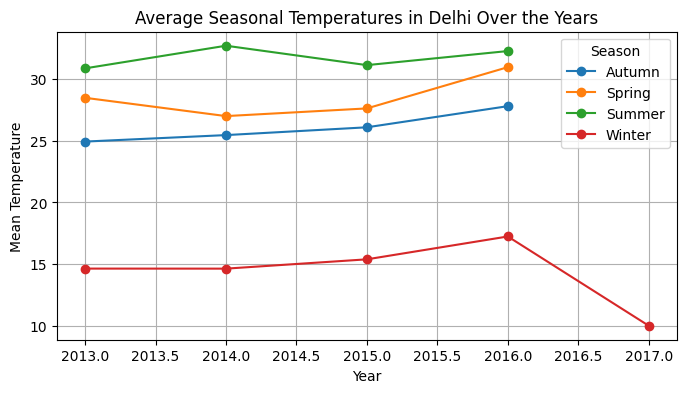

In [33]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)


seasonal_avg = df.groupby(['year', 'season'])['meantemp'].mean().unstack()
seasonal_avg.plot(marker='o', figsize=(8, 4))
plt.title("Average Seasonal Temperatures in Delhi Over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.grid()
plt.legend(title='Season')
plt.show()


## Monthly Mean

In [36]:
df['meantemp']

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

<Axes: xlabel='year,month'>

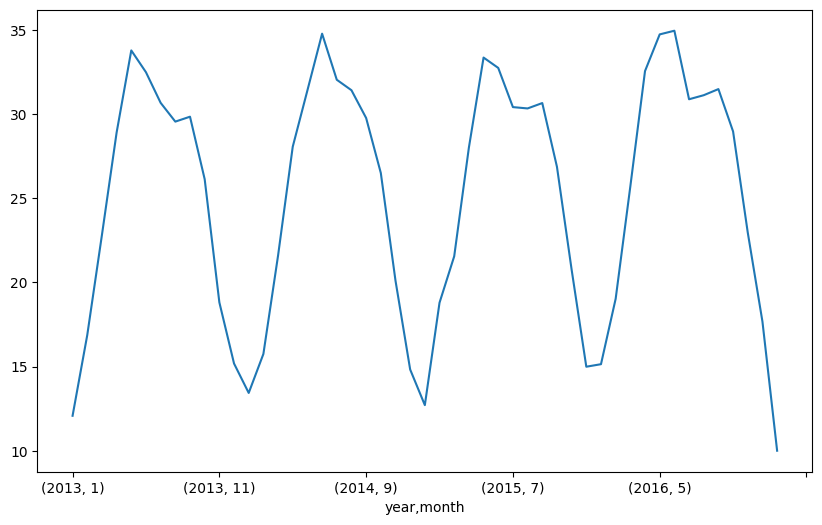

In [39]:
monthly_mean.plot(figsize=(10, 6), label='monthly mean')

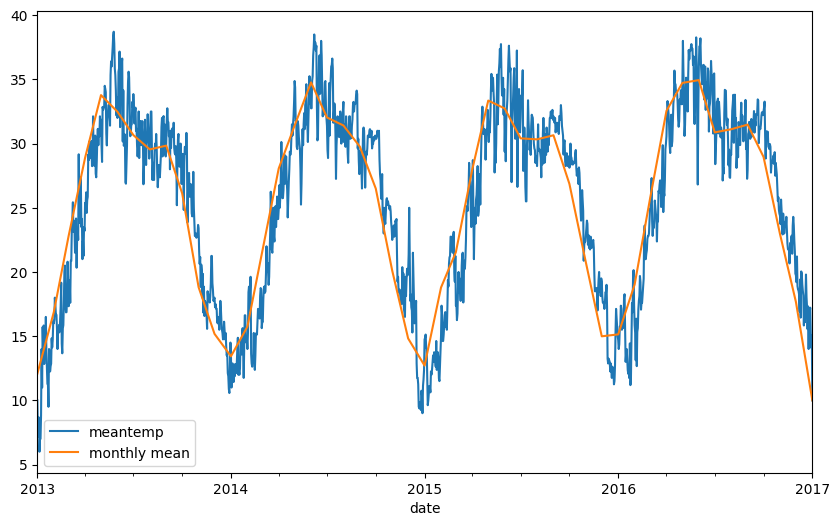

In [50]:
monthly_mean = df.drop(['month_name', 'season'], axis=1).resample('ME').mean()
df['meantemp'].plot(figsize=(10, 6), label='meantemp')
monthly_mean['meantemp'].plot(figsize=(10, 6), label='monthly mean')
plt.legend()
plt.show()

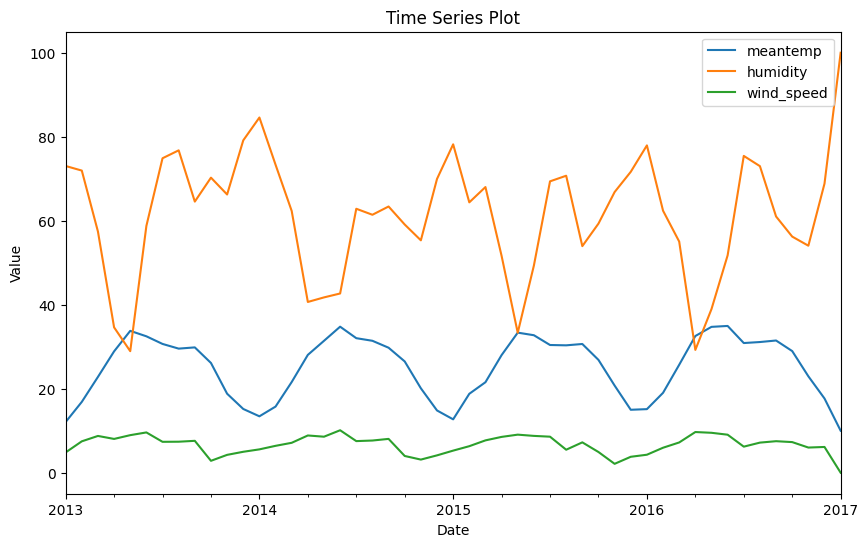

In [48]:
monthly_mean['meantemp'].plot(figsize=(10, 6), title='Time Series Plot')
monthly_mean['humidity'].plot(figsize=(10, 6), title='Time Series Plot')
monthly_mean['wind_speed'].plot(figsize=(10, 6), title='Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [49]:
df.resample('Y').sum()

C:\Users\promi\AppData\Local\Temp\ipykernel_3328\1004694227.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()


,meantemp,humidity,wind_speed,meanpressure,day,year,month,month_name,meantemp_change,season
date,,,,,,,,,,
2013-12-31,9048.895238,23011.896429,2491.947500,367789.392857,5738,734745,2382,JanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJ...,1.782629,WinterWinterWinterWinterWinterWinterWinterWint...
2014-12-31,9128.895542,21815.298757,2465.993978,368046.715540,5738,735110,2382,JanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJ...,0.803076,WinterWinterWinterWinterWinterWinterWinterWint...
2015-12-31,9166.825893,22422.128869,2365.420089,368224.709821,5738,735475,2382,JanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJ...,1.025382,WinterWinterWinterWinterWinterWinterWinterWint...
2016-12-31,9919.834526,21498.903655,2621.467622,373158.030364,5767,737856,2384,JanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJ...,0.876861,WinterWinterWinterWinterWinterWinterWinterWint...
2017-12-31,10.000000,100.000000,0.000000,1016.000000,1,2017,1,Jan,-0.335664,Winter


In [51]:
monthly_sum = df.resample('M').sum()
monthly_sum.head()

C:\Users\promi\AppData\Local\Temp\ipykernel_3328\768676654.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = df.resample('M').sum()


,meantemp,humidity,wind_speed,meanpressure,day,year,month,month_name,meantemp_change,season
date,,,,,,,,,,
2013-01-31,374.317857,2263.892857,149.851310,31553.279762,496,62403,31,JanJanJanJanJanJanJanJanJanJanJanJanJanJanJanJ...,1.079327,WinterWinterWinterWinterWinterWinterWinterWint...
2013-02-28,472.291667,2014.279762,209.274524,28446.488095,406,56364,56,FebFebFebFebFebFebFebFebFebFebFebFebFebFebFebF...,0.303002,WinterWinterWinterWinterWinterWinterWinterWint...
2013-03-31,707.240476,1779.934524,271.475357,31363.751190,496,62403,93,MarMarMarMarMarMarMarMarMarMarMarMarMarMarMarM...,0.340087,SpringSpringSpringSpringSpringSpringSpringSpri...
2013-04-30,866.853571,1038.363095,241.391548,30188.770238,465,60390,120,AprAprAprAprAprAprAprAprAprAprAprAprAprAprAprA...,0.345945,SpringSpringSpringSpringSpringSpringSpringSpri...
2013-05-31,1047.079762,897.085714,277.247024,30997.650000,496,62403,155,MayMayMayMayMayMayMayMayMayMayMayMayMayMayMayM...,0.113530,SpringSpringSpringSpringSpringSpringSpringSpri...


## Rolling mean, sum, or other statistics over a specified window of time.

rolling mean and sum over a 7-day window


what is rolling mean?

In time series analysis, "rolling" (or moving) calculations involve creating a series of statistics over a specified window of time, which moves step-by-step along the data series. This can be particularly useful for smoothing out short-term fluctuations and highlighting longer-term trends or cycles



A rolling mean (also known as a moving average) calculates the average of the last 
𝑛
n data points for each point in the series. As the window moves forward, it includes the next data point and excludes the oldest data point in the previous window.

In [52]:
rolling_mean = df['meantemp'].rolling(window=7).mean()
rolling_sum = df['meantemp'].rolling(window=7).sum()

# Add rolling mean and rolling sum to the original DataFrame
df['rolling_mean'] = rolling_mean
df['rolling_sum'] = rolling_sum

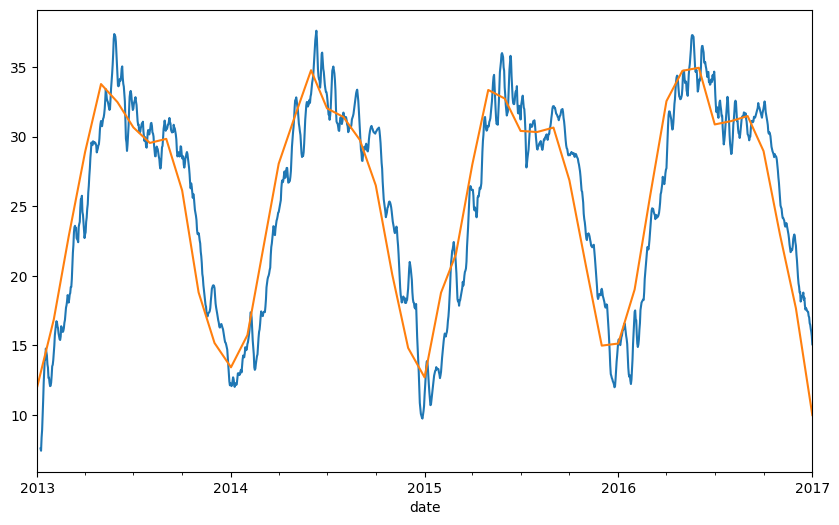

In [53]:
df['rolling_mean'].plot(figsize=(10, 6), label='Rolling mean');
monthly_mean['meantemp'].plot(figsize=(10, 6), label='Monthly mean');

## Seasonal Heatmap

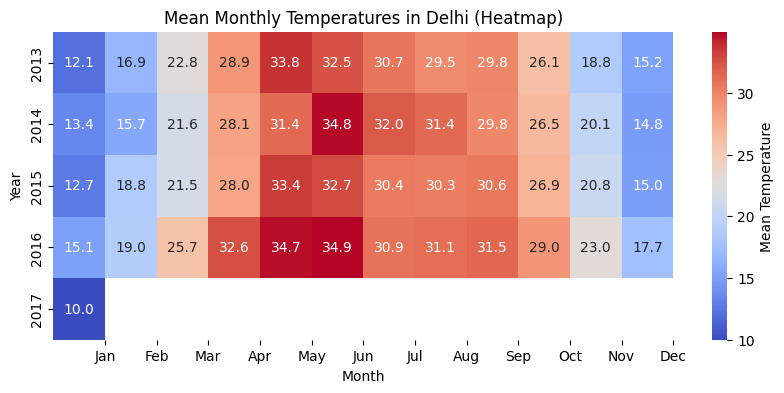

In [54]:
heatmap_data = df.groupby(['year', 'month'])['meantemp'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Mean Temperature'})
plt.title("Mean Monthly Temperatures in Delhi (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# boxplot

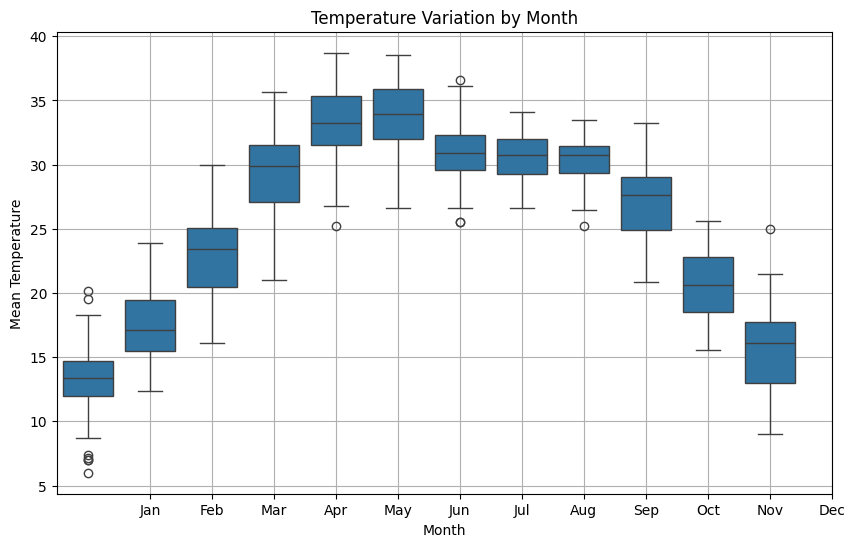

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='meantemp')
plt.title("Temperature Variation by Month")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

# Correlation Analysis

In [56]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'day', 'year',
       'month', 'month_name', 'meantemp_change', 'season', 'rolling_mean',
       'rolling_sum'],
      dtype='object')

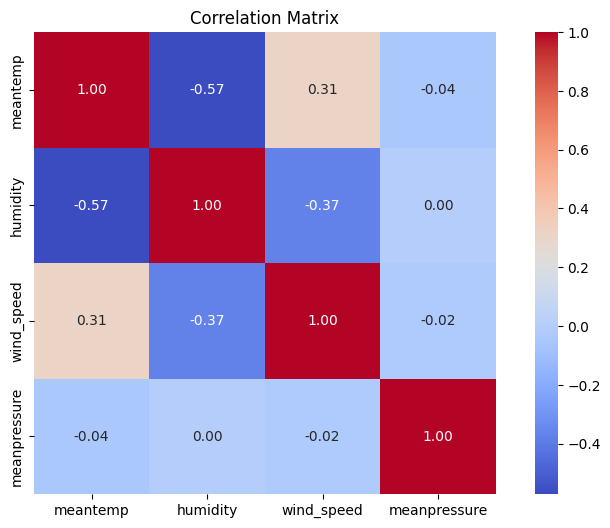

In [57]:
correlation_matrix = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure',]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [58]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'day', 'year',
       'month', 'month_name', 'meantemp_change', 'season', 'rolling_mean',
       'rolling_sum'],
      dtype='object')

In [59]:


# Function to plot scatter with proper title and labels
def plot_scatter(df, x, y):
    plt.figure(figsize=(10, 4))
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f"{column_map.get(x, x)} vs {column_map.get(y, y)}")
    plt.xlabel(column_map.get(x, x))
    plt.ylabel(column_map.get(y, y))
    plt.grid()
    plt.show()

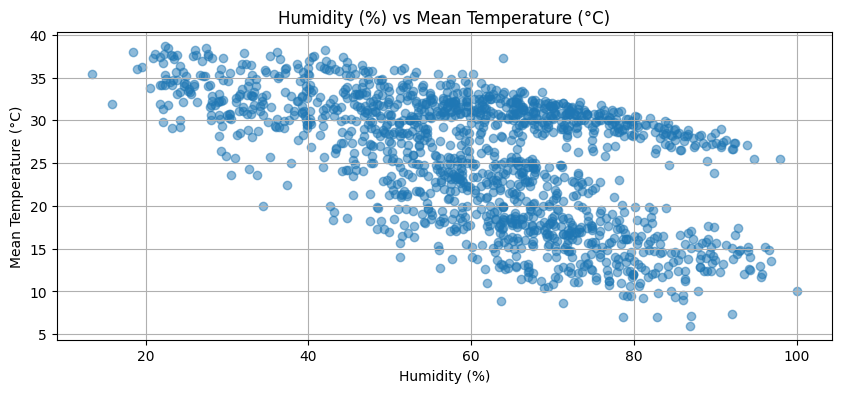

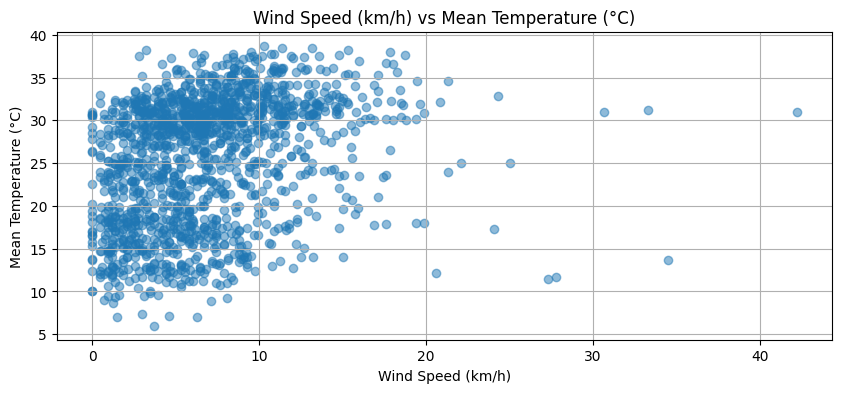

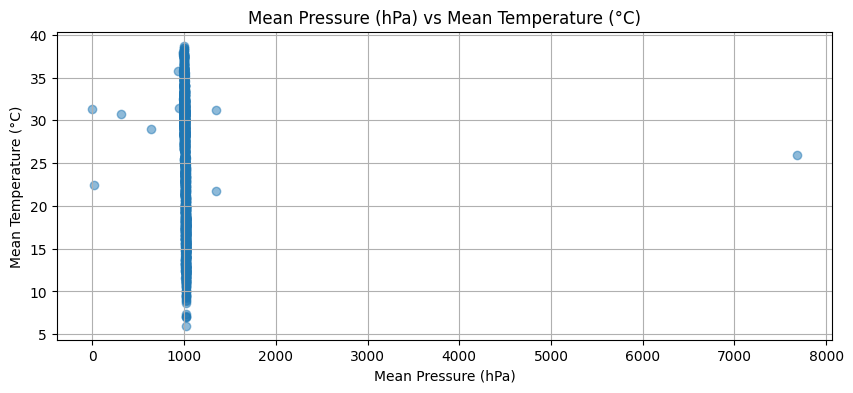

In [60]:
for i in ['humidity', 'wind_speed', 'meanpressure']:
    plot_scatter (df, x=i, y='meantemp')

In [61]:
df['lagged_temp'] = df['meantemp'].shift(1)

# Calculate the correlation between the current temperature and the lagged temperature
lagged_correlation = df['meantemp'].corr(df['lagged_temp'])

# Print the lagged correlation
print(f"Lagged Correlation with 1 Month Lag: {lagged_correlation:.2f}")

Lagged Correlation with 1 Month Lag: 0.97


In [62]:
time_correlation = df['year'].corr(df['meantemp'])
print(f"Correlation with Time (Year): {time_correlation:.2f}")

Correlation with Time (Year): 0.10


# Supplementary Plot

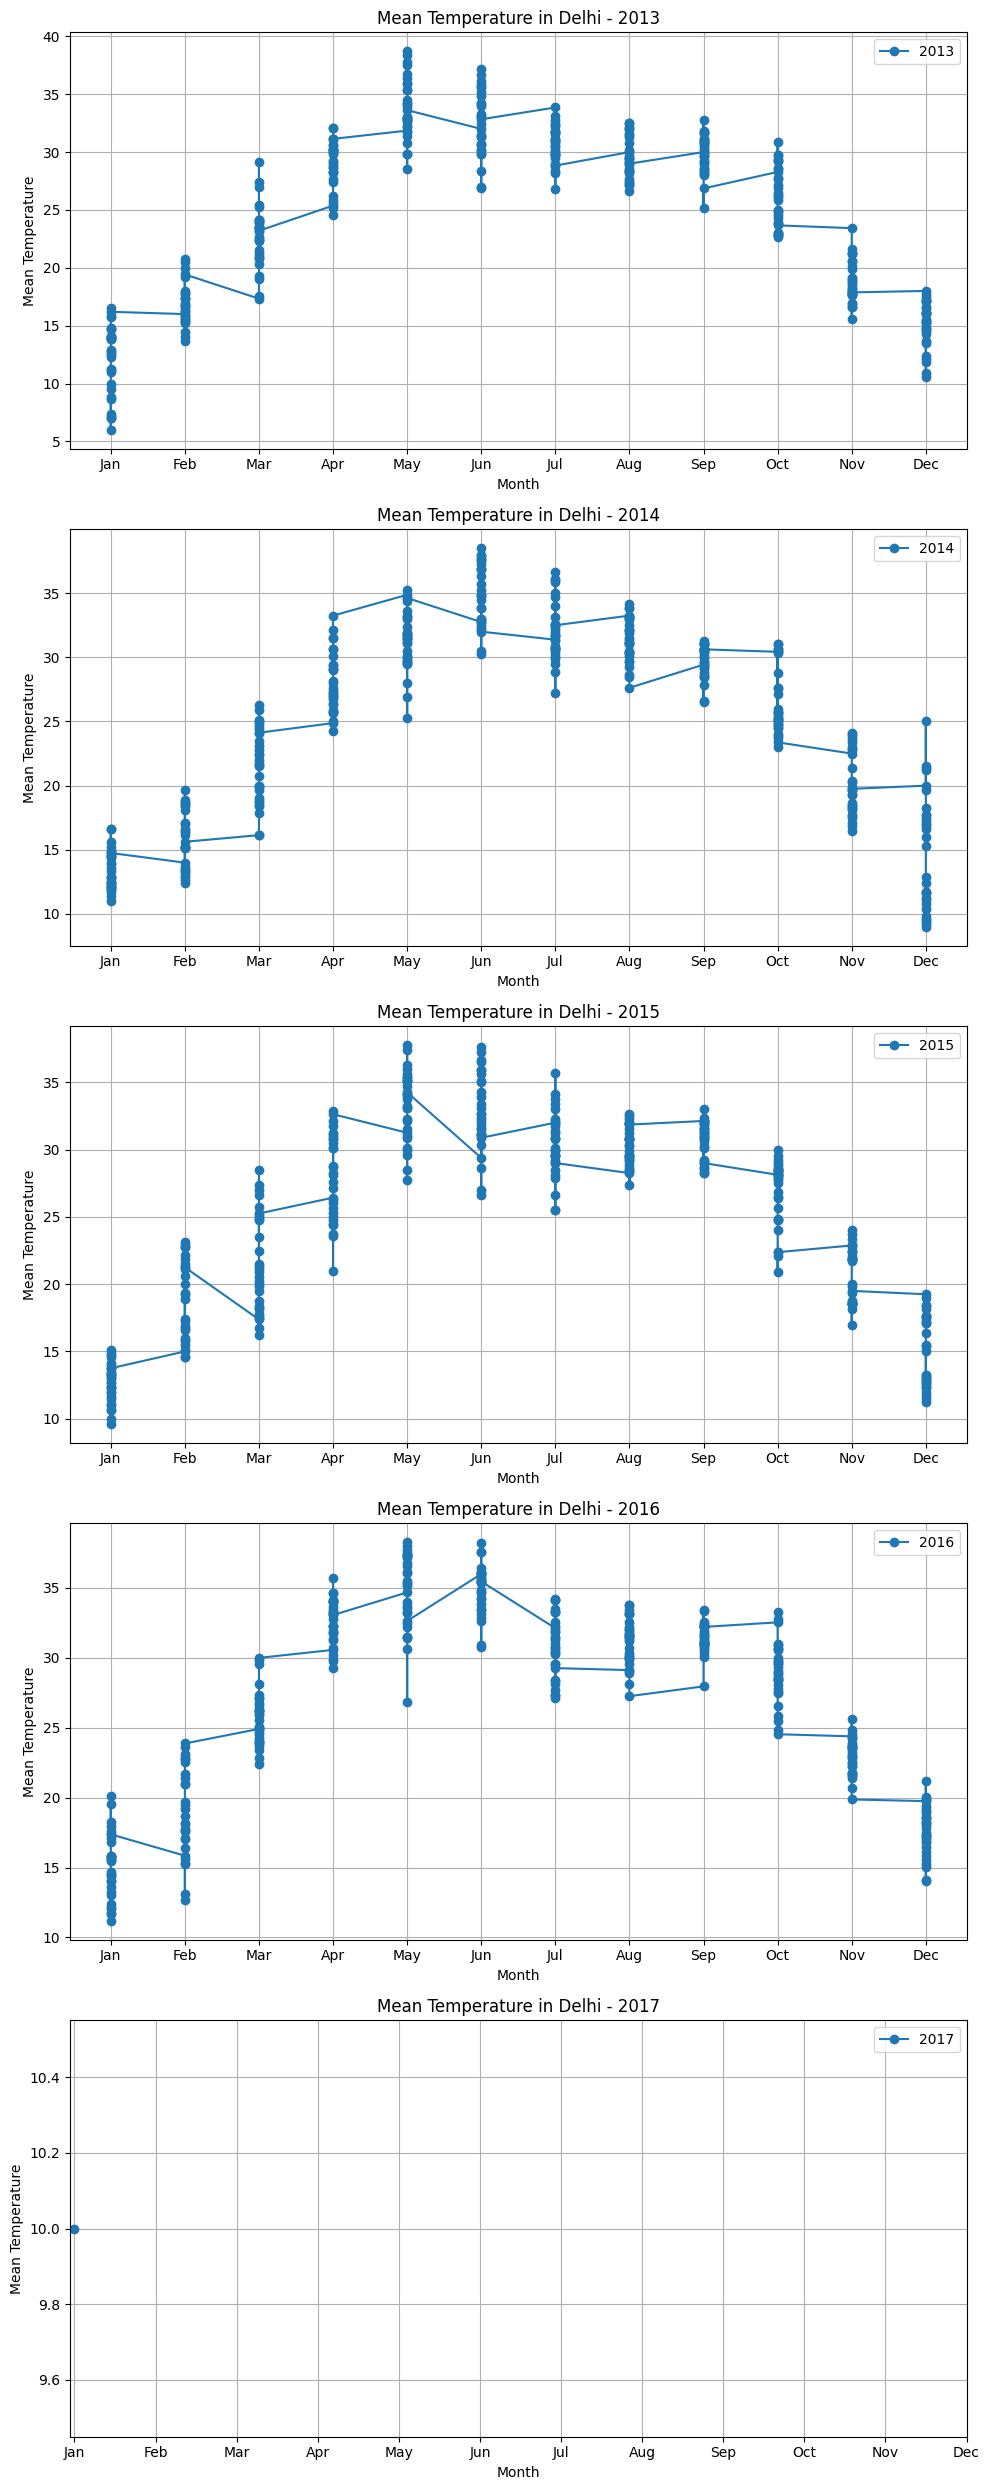

In [63]:
years = df['year'].unique()
num_years = len(years)


plt.figure(figsize=(10, 5 * num_years))

for i, year in enumerate(years):
    plt.subplot(num_years, 1, i + 1)  # Create a subplot for each year
    group = df[df['year'] == year]
    plt.plot(group['month'], group['meantemp'], marker='o', label=str(year))
    
    # Adding title and labels for each subplot
    plt.title(f"Mean Temperature in Delhi - {year}")
    plt.xlabel("Month")
    plt.ylabel("Mean Temperature")
    plt.xticks(range(1, 13), 
               ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


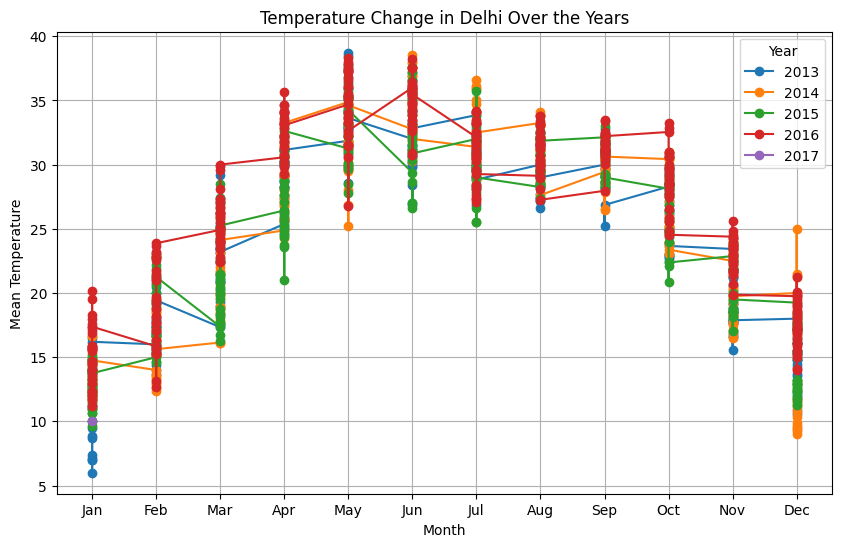

In [64]:

plt.figure(figsize=(10, 6))

# Loop through each year and plot the data
for year, group in df.groupby('year'):
    plt.plot(group['month'], group['meantemp'], marker='o', label=str(year))

# Adding title and labels
plt.title("Temperature Change in Delhi Over the Years")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid()
plt.show()